In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import yfinance as yf

### Load Data

In [86]:
fb = yf.Ticker('FB').history(period='max').Close
az = yf.Ticker('AMZN').history(period='max').Close
ap = yf.Ticker('AAPL').history(period='max').Close
nf = yf.Ticker('NFLX').history(period='max').Close
gg = yf.Ticker('GOOGL').history(period='max').Close
data = pd.DataFrame({'FB':fb,'AMZN':az,'AAPL':ap,'NFLX':nf,'GOOGL':gg}).dropna()
data

,FB,AMZN,AAPL,NFLX,GOOGL
Date,,,,,
2012-05-18,38.23,213.85,16.37,9.99,300.50
2012-05-21,34.03,218.11,17.32,10.25,307.36
2012-05-22,31.00,215.33,17.19,9.67,300.70
2012-05-23,32.00,217.28,17.61,10.27,305.04
2012-05-24,33.03,215.24,17.45,10.04,302.13
...,...,...,...,...,...
2020-10-05,264.65,3199.20,116.50,520.65,1482.83
2020-10-06,258.66,3099.96,113.16,505.87,1451.02
2020-10-07,258.12,3195.69,115.08,534.66,1459.14


In [87]:
data['FB_Ret'] = data['FB'].pct_change()
data['AMZN_Ret'] = data['AMZN'].pct_change()
data['AAPL_Ret'] = data['AAPL'].pct_change()
data['NFLX_Ret'] = data['NFLX'].pct_change()
data['GOOGL_Ret'] = data['GOOGL'].pct_change()
data

,FB,AMZN,AAPL,NFLX,GOOGL,FB_Ret,AMZN_Ret,AAPL_Ret,NFLX_Ret,GOOGL_Ret
Date,,,,,,,,,,
2012-05-18,38.23,213.85,16.37,9.99,300.50,NaN,NaN,NaN,NaN,NaN
2012-05-21,34.03,218.11,17.32,10.25,307.36,-0.109861,0.019921,0.058033,0.026026,0.022829
2012-05-22,31.00,215.33,17.19,9.67,300.70,-0.089039,-0.012746,-0.007506,-0.056585,-0.021668
2012-05-23,32.00,217.28,17.61,10.27,305.04,0.032258,0.009056,0.024433,0.062048,0.014433
2012-05-24,33.03,215.24,17.45,10.04,302.13,0.032188,-0.009389,-0.009086,-0.022395,-0.009540
...,...,...,...,...,...,...,...,...,...,...
2020-10-05,264.65,3199.20,116.50,520.65,1482.83,0.018120,0.023744,0.030791,0.034966,0.018707
2020-10-06,258.66,3099.96,113.16,505.87,1451.02,-0.022634,-0.031020,-0.028670,-0.028388,-0.021452
2020-10-07,258.12,3195.69,115.08,534.66,1459.14,-0.002088,0.030881,0.016967,0.056912,0.005596


In [88]:
data.to_csv('FAANG.csv')

### 各別走勢&收益率圖

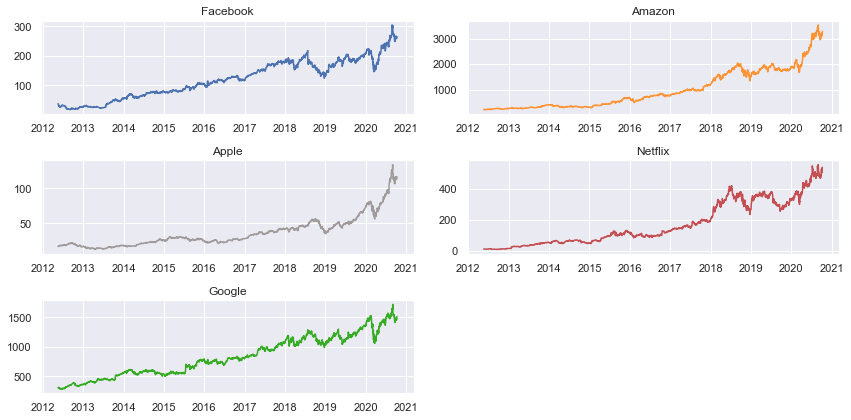

In [89]:
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)
ax1.plot(data['FB'],'b')
ax1.set_title('Facebook')
ax2.plot(data['AMZN'],'#FF9333')
ax2.set_title('Amazon')
ax3.plot(data['AAPL'],'#A09A9B')
ax3.set_title('Apple')
ax4.plot(data['NFLX'],'r')
ax4.set_title('Netflix')
ax5.plot(data['GOOGL'],'#36AB24')
ax5.set_title('Google')
plt.tight_layout()
plt.show()
fig.savefig('FAANG_Trend.png')

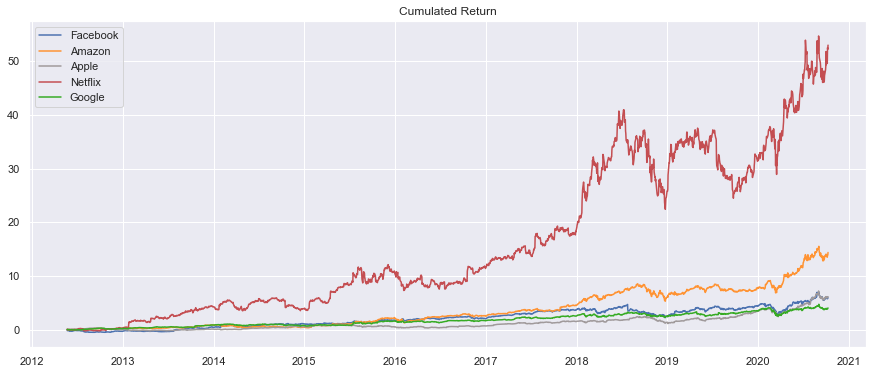

In [90]:
ret_fig = plt.figure(figsize=(15,6))
ax = ret_fig.add_subplot()
ax.plot((1+data['FB_Ret']).cumprod()-1,'b',label='Facebook')
ax.plot((1+data['AMZN_Ret']).cumprod()-1,'#FF9333',label='Amazon')
ax.plot((1+data['AAPL_Ret']).cumprod()-1,'#A09A9B',label='Apple')
ax.plot((1+data['NFLX_Ret']).cumprod()-1,'r',label='Netflix')
ax.plot((1+data['GOOGL_Ret']).cumprod()-1,'#36AB24',label='Google')
ax.set_title('Cumulated Return')
ax.legend(loc='best')
ret_fig.savefig('FAANG_returns.png')

In [91]:
print('Facebook has grown %.2f times higher since May 2012'%((1+data['FB_Ret']).cumprod()[-1]))
print('Amazon has grown %.2f times higher since May 2012'%((1+data['AMZN_Ret']).cumprod()[-1]))
print('Apple has grown %.2f times higher since May 2012'%((1+data['AAPL_Ret']).cumprod()[-1]))
print('Netflix has grown %.2f times higher since May 2012'%((1+data['NFLX_Ret']).cumprod()[-1]))
print('Google has grown %.2f times higher since May 2012'%((1+data['GOOGL_Ret']).cumprod()[-1]))

Facebook has grown 6.92 times higher since May 2012
Amazon has grown 15.37 times higher since May 2012
Apple has grown 7.15 times higher since May 2012
Netflix has grown 54.00 times higher since May 2012
Google has grown 5.03 times higher since May 2012


### 各別風險

In [92]:
data.iloc[:,-5:].std().sort_values(ascending=False)

NFLX_Ret     0.030274
FB_Ret       0.023552
AMZN_Ret     0.019116
AAPL_Ret     0.017922
GOOGL_Ret    0.015901
dtype: float64

In [93]:
#這裡取個股平均收益當作MARR(Minimum Acceptable Rate of Return)
#下檔風險為 低於MARR的發散程度
def downsideRisk(stock_return):
    mu = stock_return.mean()
    temp = stock_return[stock_return<mu]
    downsideRisk = ((sum((mu-temp)**2))/len(stock_return))**0.5
    return(downsideRisk)

In [94]:
print('Facebook has downside risk of %.5f'%downsideRisk(data['FB_Ret']))
print('Amazon has downside risk of %.5f'%downsideRisk(data['AMZN_Ret']))
print('Apple has downside risk of %.5f'%downsideRisk(data['AAPL_Ret']))
print('Netflix has downside risk of %.5f'%downsideRisk(data['NFLX_Ret']))
print('Google has downside risk of %.5f'%downsideRisk(data['GOOGL_Ret']))

Facebook has downside risk of 0.01607
Amazon has downside risk of 0.01319
Apple has downside risk of 0.01288
Netflix has downside risk of 0.01943
Google has downside risk of 0.01104


<ipython-input-95-a4bcf0b5e949>:16: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  ax1.annotate('{0:.5f}'.format(dr_bar[i].get_height()),


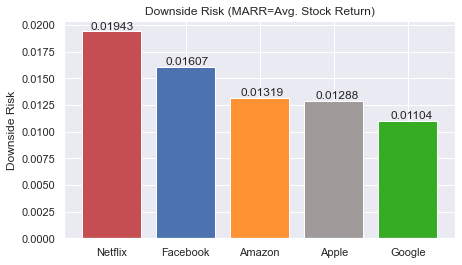

In [95]:
#Define Color
color = ['r','b','#FF9333','#A09A9B','#36AB24']

#Create figure
drPlot = plt.figure(figsize=(7,4))

#Downside Risk
ax1 = drPlot.add_subplot(111)
downsideRisk_List = [downsideRisk(data['NFLX_Ret']),downsideRisk(data['FB_Ret']),downsideRisk(data['AMZN_Ret']),
                  downsideRisk(data['AAPL_Ret']),downsideRisk(data['GOOGL_Ret'])]
dr_bar = ax1.bar(['Netflix','Facebook','Amazon','Apple','Google'],downsideRisk_List,color=color)
plt.title('Downside Risk (MARR=Avg. Stock Return)')
plt.ylabel('Downside Risk')
indx = np.arange(len(downsideRisk_List))
for i in indx:
    ax1.annotate('{0:.5f}'.format(dr_bar[i].get_height()),
                xy=(dr_bar[i].get_x()+dr_bar[i].get_width()/2,dr_bar[i].get_height()),
                textcoords='offset points',
                ha='center',
                va='bottom')
drPlot.savefig('FAANG_DownsideRisk.png')

In [96]:
#共變異數矩陣法VaR
#VaR為在給定信心水準下，最大可能損失：這裡為95%信心認為損失不會超過Var
from scipy.stats import norm
fb_Var = norm.ppf(0.05,data['FB_Ret'].mean(),data['FB_Ret'].std())
amzn_Var = norm.ppf(0.05,data['AMZN_Ret'].mean(),data['AMZN_Ret'].std())
aapl_Var = norm.ppf(0.05,data['AAPL_Ret'].mean(),data['AAPL_Ret'].std())
nflx_Var = norm.ppf(0.05,data['NFLX_Ret'].mean(),data['NFLX_Ret'].std())
googl_Var = norm.ppf(0.05,data['GOOGL_Ret'].mean(),data['GOOGL_Ret'].std())
print('Facebook has a VaR of %.5f'%(fb_Var))
print('Amazon has a VaR of %.5f'%(amzn_Var))
print('Apple has a VaR of %.5f'%(aapl_Var))
print('Netflix has a VaR of %.5f'%(nflx_Var))
print('Google has a VaR of %.5f'%(googl_Var))

Facebook has a VaR of -0.03755
Amazon has a VaR of -0.02997
Apple has a VaR of -0.02839
Netflix has a VaR of -0.04746
Google has a VaR of -0.02526


<ipython-input-97-1efd5265fc78>:16: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  ax1.annotate('{0:.5f}'.format(var_bar[i].get_height()),


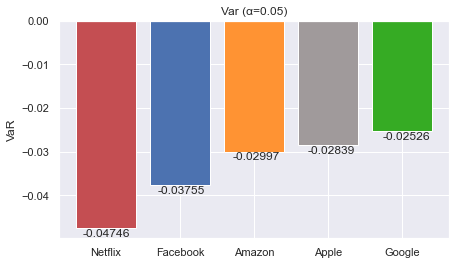

In [97]:
#Define Color
color = ['r','b','#FF9333','#A09A9B','#36AB24']

#Create figure
varPlot = plt.figure(figsize=(7,4))

#Downside Risk
ax1 = varPlot.add_subplot(111)
var = [fb_Var,amzn_Var,aapl_Var,nflx_Var,googl_Var]
var.sort()
var_bar = ax1.bar(['Netflix','Facebook','Amazon','Apple','Google'],var,color=color)
plt.ylabel('VaR')
plt.title('Var (α=0.05)')
indx = np.arange(len(var))
for i in indx:
    ax1.annotate('{0:.5f}'.format(var_bar[i].get_height()),
                xy=(var_bar[i].get_x()+var_bar[i].get_width()/2,var_bar[i].get_height()-0.0024),
                textcoords='offset points',
                ha='center',
                va='bottom')
varPlot.savefig('FAANG_VaR.png')

In [98]:
#Expected Shortfall ->那些比VaR更差的數字的平均值
print('Facebook has a Expected Shortfall of %.5f'%(data['FB_Ret'][data['FB_Ret']<fb_Var].mean()))
print('Amazon has a Expected Shortfall of %.5f'%(data['AMZN_Ret'][data['AMZN_Ret']<amzn_Var].mean()))
print('Apple has a Expected Shortfall of %.5f'%(data['AAPL_Ret'][data['AAPL_Ret']<aapl_Var].mean()))
print('Netflix has a Expected Shortfall of %.5f'%(data['NFLX_Ret'][data['NFLX_Ret']<nflx_Var].mean()))
print('Google has a Expected Shortfall of %.5f'%(data['GOOGL_Ret'][data['GOOGL_Ret']<googl_Var].mean()))

Facebook has a Expected Shortfall of -0.05614
Amazon has a Expected Shortfall of -0.04551
Apple has a Expected Shortfall of -0.04504
Netflix has a Expected Shortfall of -0.07194
Google has a Expected Shortfall of -0.03954


<ipython-input-99-3d709fabb454>:11: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  ax1.annotate('{0:.5f}'.format(es_bar[i].get_height()),


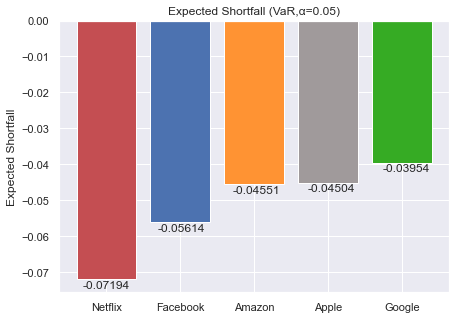

In [99]:
esPlot = plt.figure(figsize=(7,5))
ax1 = esPlot.add_subplot(111)
ES = [data['NFLX_Ret'][data['NFLX_Ret']<nflx_Var].mean(),data['FB_Ret'][data['FB_Ret']<fb_Var].mean(),
      data['AMZN_Ret'][data['AMZN_Ret']<amzn_Var].mean(),data['AAPL_Ret'][data['AAPL_Ret']<aapl_Var].mean(),
     data['GOOGL_Ret'][data['GOOGL_Ret']<googl_Var].mean()]
es_bar = ax1.bar(['Netflix','Facebook','Amazon','Apple','Google'],ES,color=color)
plt.title('Expected Shortfall (VaR,α=0.05)')
plt.ylabel('Expected Shortfall')
indx = np.arange(len(ES))
for i in indx:
    ax1.annotate('{0:.5f}'.format(es_bar[i].get_height()),
                xy=(es_bar[i].get_x()+es_bar[i].get_width()/2,es_bar[i].get_height()-0.003),
                textcoords='offset points',
                ha='center',
                va='bottom')
esPlot.savefig('FAANG_ES.png')

In [100]:
# Maximum Drawdown
def maxDrawdown(stock_return,color=None,title=None):
    value = (1+stock_return).cumprod()
    downValue = value.cummax()-value
    downPercentage = downValue/(downValue+value)
    maximumDrawDownValue = downValue.max()
    maximumDrawDownPercentage = downPercentage.max()
    for index,value in downPercentage.items():
        if value == maximumDrawDownPercentage:
            date = index
            break
    downPercentageplot = plt.plot(downPercentage,color=color)
    plt.annotate('MD=%.4f'%(maximumDrawDownPercentage),xy=(index, maximumDrawDownPercentage))
    plt.ylabel('MDD')
    plt.title(title)
    return(downPercentageplot)

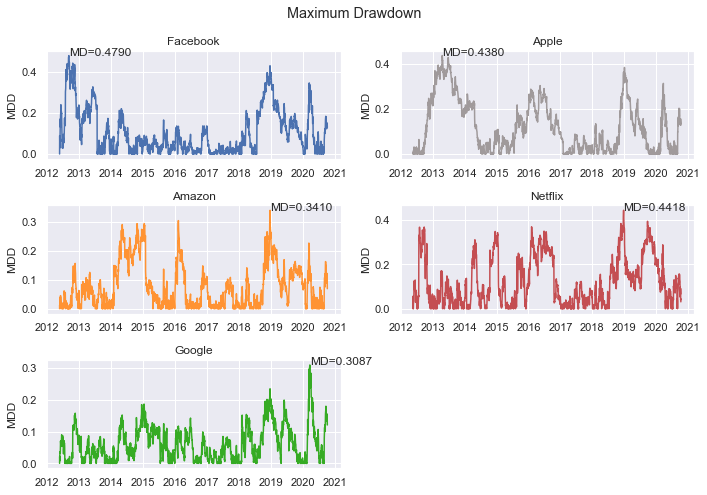

In [101]:
color = ['r','b','#FF9333','#A09A9B','#36AB24']
figgg = plt.figure(figsize=(10,7))
figgg.suptitle('Maximum Drawdown')
ax1 = figgg.add_subplot(321)
ax1 = maxDrawdown(data['FB_Ret'],'b','Facebook')
ax2 = figgg.add_subplot(322)
ax2 = maxDrawdown(data['AAPL_Ret'],'#A09A9B','Apple')
ax3 = figgg.add_subplot(323)
ax3 = maxDrawdown(data['AMZN_Ret'],'#FF9333','Amazon')
ax4 = figgg.add_subplot(324)
ax4 = maxDrawdown(data['NFLX_Ret'],'r','Netflix')
ax5 = figgg.add_subplot(325)
ax5 = maxDrawdown(data['GOOGL_Ret'],'#36AB24','Google')
plt.tight_layout()
plt.show()
figgg.savefig('FAANG_MDD.png')

### 合併VaR,DownsideRisk,ES into one figure

<ipython-input-102-d89fad95ee46>:16: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  ax1.annotate('{0:.5f}'.format(dr_bar[i].get_height()),
<ipython-input-102-d89fad95ee46>:31: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  ax2.annotate('{0:.5f}'.format(var_bar[i].get_height()),
<ipython-input-102-d89fad95ee46>:46: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  ax3.annotate('{0:.5f}'.format(es_bar[i].get_height()),


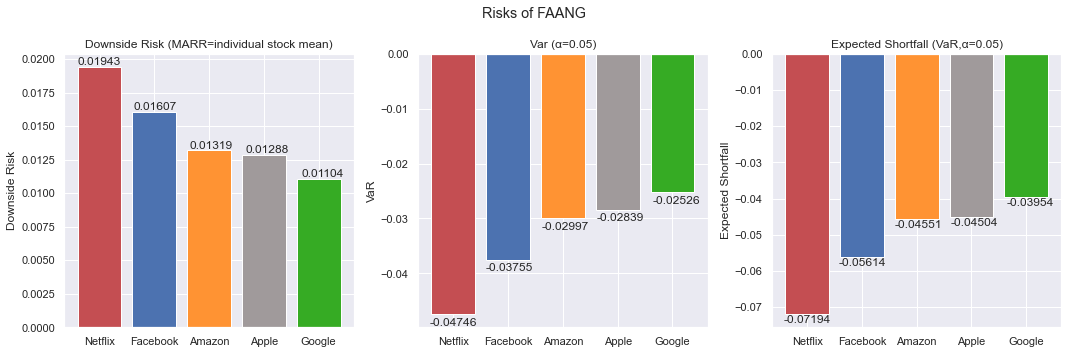

In [102]:
#Define Color
color = ['r','b','#FF9333','#A09A9B','#36AB24']

#Create figure
combinePlot = plt.figure(figsize=(15,5))

#Downside Risk
ax1 = combinePlot.add_subplot(131)
downsideRisk_List = [downsideRisk(data['NFLX_Ret']),downsideRisk(data['FB_Ret']),downsideRisk(data['AMZN_Ret']),
                  downsideRisk(data['AAPL_Ret']),downsideRisk(data['GOOGL_Ret'])]
dr_bar = ax1.bar(['Netflix','Facebook','Amazon','Apple','Google'],downsideRisk_List,color=color)
plt.title('Downside Risk (MARR=individual stock mean)')
plt.ylabel('Downside Risk')
indx = np.arange(len(downsideRisk_List))
for i in indx:
    ax1.annotate('{0:.5f}'.format(dr_bar[i].get_height()),
                xy=(dr_bar[i].get_x()+dr_bar[i].get_width()/2,dr_bar[i].get_height()),
                textcoords='offset points',
                ha='center',
                va='bottom')

#VaR
ax2 = combinePlot.add_subplot(132)
var = [fb_Var,amzn_Var,aapl_Var,nflx_Var,googl_Var]
var.sort()
var_bar = ax2.bar(['Netflix','Facebook','Amazon','Apple','Google'],var,color=color)
plt.ylabel('VaR')
plt.title('Var (α=0.05)')
indx = np.arange(len(var))
for i in indx:
    ax2.annotate('{0:.5f}'.format(var_bar[i].get_height()),
                xy=(var_bar[i].get_x()+var_bar[i].get_width()/2,var_bar[i].get_height()-0.0024),
                textcoords='offset points',
                ha='center',
                va='bottom')
#ES
ax3 = combinePlot.add_subplot(133)
ES = [data['NFLX_Ret'][data['NFLX_Ret']<nflx_Var].mean(),data['FB_Ret'][data['FB_Ret']<fb_Var].mean(),
      data['AMZN_Ret'][data['AMZN_Ret']<amzn_Var].mean(),data['AAPL_Ret'][data['AAPL_Ret']<aapl_Var].mean(),
     data['GOOGL_Ret'][data['GOOGL_Ret']<googl_Var].mean()]
es_bar = ax3.bar(['Netflix','Facebook','Amazon','Apple','Google'],ES,color=color)
plt.title('Expected Shortfall (VaR,α=0.05)')
plt.ylabel('Expected Shortfall')
indx = np.arange(len(ES))
for i in indx:
    ax3.annotate('{0:.5f}'.format(es_bar[i].get_height()),
                xy=(es_bar[i].get_x()+es_bar[i].get_width()/2,es_bar[i].get_height()-0.003),
                textcoords='offset points',
                ha='center',
                va='bottom')
combinePlot.suptitle('Risks of FAANG')

plt.tight_layout()
plt.show()

<ipython-input-103-2fbe61224a1a>:17: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  f3_ax1.annotate('{0:.5f}'.format(dr_bar[i].get_height()),
<ipython-input-103-2fbe61224a1a>:32: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  f3_ax2.annotate('{0:.5f}'.format(var_bar[i].get_height()),
<ipython-input-103-2fbe61224a1a>:48: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  f3_ax3.annotate('{0:.5f}'.format(es_bar[i].get_height()),
<ipython-input-103-2fbe61224a1a>:75: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  plt.tight_layout()


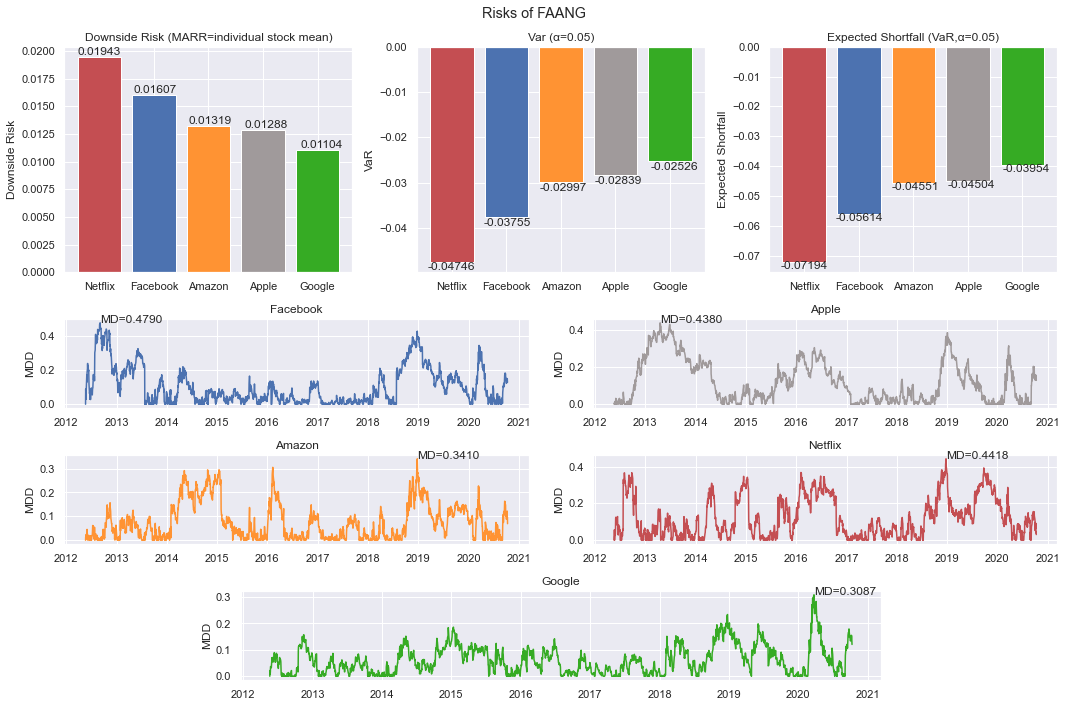

In [103]:
#Define Color
color = ['r','b','#FF9333','#A09A9B','#36AB24']

#Define Figure
fig3 = plt.figure(constrained_layout=True,figsize=(15,10))
gs = fig3.add_gridspec(10, 6)

#Downside Risk
f3_ax1 = fig3.add_subplot(gs[0:4, 0:2])
downsideRisk_List = [downsideRisk(data['NFLX_Ret']),downsideRisk(data['FB_Ret']),downsideRisk(data['AMZN_Ret']),
                  downsideRisk(data['AAPL_Ret']),downsideRisk(data['GOOGL_Ret'])]
dr_bar = f3_ax1.bar(['Netflix','Facebook','Amazon','Apple','Google'],downsideRisk_List,color=color)
plt.title('Downside Risk (MARR=individual stock mean)')
plt.ylabel('Downside Risk')
indx = np.arange(len(downsideRisk_List))
for i in indx:
    f3_ax1.annotate('{0:.5f}'.format(dr_bar[i].get_height()),
                xy=(dr_bar[i].get_x()+dr_bar[i].get_width()/2,dr_bar[i].get_height()),
                textcoords='offset points',
                ha='center',
                va='bottom')

#VaR
f3_ax2 = fig3.add_subplot(gs[0:4,2:4])
var = [fb_Var,amzn_Var,aapl_Var,nflx_Var,googl_Var]
var.sort()
var_bar = f3_ax2.bar(['Netflix','Facebook','Amazon','Apple','Google'],var,color=color)
plt.ylabel('VaR')
plt.title('Var (α=0.05)')
indx = np.arange(len(var))
for i in indx:
    f3_ax2.annotate('{0:.5f}'.format(var_bar[i].get_height()),
                xy=(var_bar[i].get_x()+var_bar[i].get_width()/2,var_bar[i].get_height()-0.0024),
                textcoords='offset points',
                ha='center',
                va='bottom')
    
#ES
f3_ax3 = fig3.add_subplot(gs[0:4,4:])
ES = [data['NFLX_Ret'][data['NFLX_Ret']<nflx_Var].mean(),data['FB_Ret'][data['FB_Ret']<fb_Var].mean(),
      data['AMZN_Ret'][data['AMZN_Ret']<amzn_Var].mean(),data['AAPL_Ret'][data['AAPL_Ret']<aapl_Var].mean(),
     data['GOOGL_Ret'][data['GOOGL_Ret']<googl_Var].mean()]
es_bar = f3_ax3.bar(['Netflix','Facebook','Amazon','Apple','Google'],ES,color=color)
plt.title('Expected Shortfall (VaR,α=0.05)')
plt.ylabel('Expected Shortfall')
indx = np.arange(len(ES))
for i in indx:
    f3_ax3.annotate('{0:.5f}'.format(es_bar[i].get_height()),
                xy=(es_bar[i].get_x()+es_bar[i].get_width()/2,es_bar[i].get_height()-0.003),
                textcoords='offset points',
                ha='center',
                va='bottom')

#FB MDD
f3_ax4 = fig3.add_subplot(gs[4:6,:3])
f3_ax4 = maxDrawdown(data['FB_Ret'],'b','Facebook')

#AAPL MDD
f3_ax5 = fig3.add_subplot(gs[4:6,3:])
f3_ax5 = maxDrawdown(data['AAPL_Ret'],'#A09A9B','Apple')

#AMZN MDD
f3_ax6 = fig3.add_subplot(gs[6:8,:3])
f3_ax6 = maxDrawdown(data['AMZN_Ret'],'#FF9333','Amazon')

#NFLX MDD
f3_ax7 = fig3.add_subplot(gs[6:8,3:])
f3_ax7 = maxDrawdown(data['NFLX_Ret'],'r','Netflix')

#GOOGL MDD
f3_ax8 = fig3.add_subplot(gs[8:,1:5])
ax5 = maxDrawdown(data['GOOGL_Ret'],'#36AB24','Google')

fig3.suptitle('Risks of FAANG')
plt.tight_layout()
plt.show()
fig3.savefig('FAANG_Risks_Conclusion.png')